In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set plotting style
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['font.size'] = 9

In [3]:
# import dataset
df = pd.read_csv(r'T:\toandangquoc\iuh_project_finals\data\TSLA_All.csv')
df.fillna(0, inplace=True)

df.sample(5)

,Unnamed: 0,date,close,high,low,open,volume,year,quarter,month,...,sma_7_low,rsi,k,d,wr,cci,ppo,sentiment_numeric,esp,P/E
1226,1226,2023-05-12,233.809998,236.960007,231.449997,236.740005,1.615530e+07,2023,2,5,...,231.633837,60.288157,26.277329,29.042206,-73.722671,-35.106357,2.025306,-1.0,2.543633,91.919714
275,275,2020-10-03,261.510000,265.056661,259.733327,261.539998,1.518583e+07,2020,4,10,...,253.618363,49.885047,71.818214,76.708036,-28.181786,69.534037,-0.729243,1.0,0.130078,2010.409505
268,268,2020-09-26,255.486674,257.033335,249.346670,252.733327,1.850963e+07,2020,3,9,...,245.184496,42.843404,34.932838,28.141759,-65.067162,-21.987802,-2.278748,1.0,0.106720,2393.997365
242,242,2020-08-31,293.200012,296.880005,291.549988,293.950012,1.734510e+07,2020,3,8,...,279.723564,71.733151,74.741246,75.096913,-25.258754,66.948508,4.029133,-1.0,0.113885,2574.532578
1636,1636,2024-06-25,510.600006,510.709991,495.500000,497.049988,1.210980e+07,2024,2,6,...,489.554839,66.630869,84.227547,46.058137,-15.772453,64.353158,1.011228,0.0,3.393380,150.469454


In [4]:
df.columns

Index(['Unnamed: 0', 'date', 'close', 'high', 'low', 'open', 'volume', 'year',
       'quarter', 'month', 'day', 'dayofweek', 'is_weekend', 'month_end',
       'holiday', 'unix', 'daily_variation', 'logs', 'market_cap',
       'close_change', 'year_change', 'ema_14', 'cma_7', 'std_7',
       'daily_return', 'high_close', 'low_open', 'cum_change', 'atr', 'dmi',
       'adx', 'cycle', 'macd', 'b_ma', 'bl', 'bu', 'sma_7', 'sma_7_up',
       'sma_7_low', 'rsi', 'k', 'd', 'wr', 'cci', 'ppo', 'sentiment_numeric',
       'esp', 'P/E'],
      dtype='object')

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.fillna(0, inplace=True)

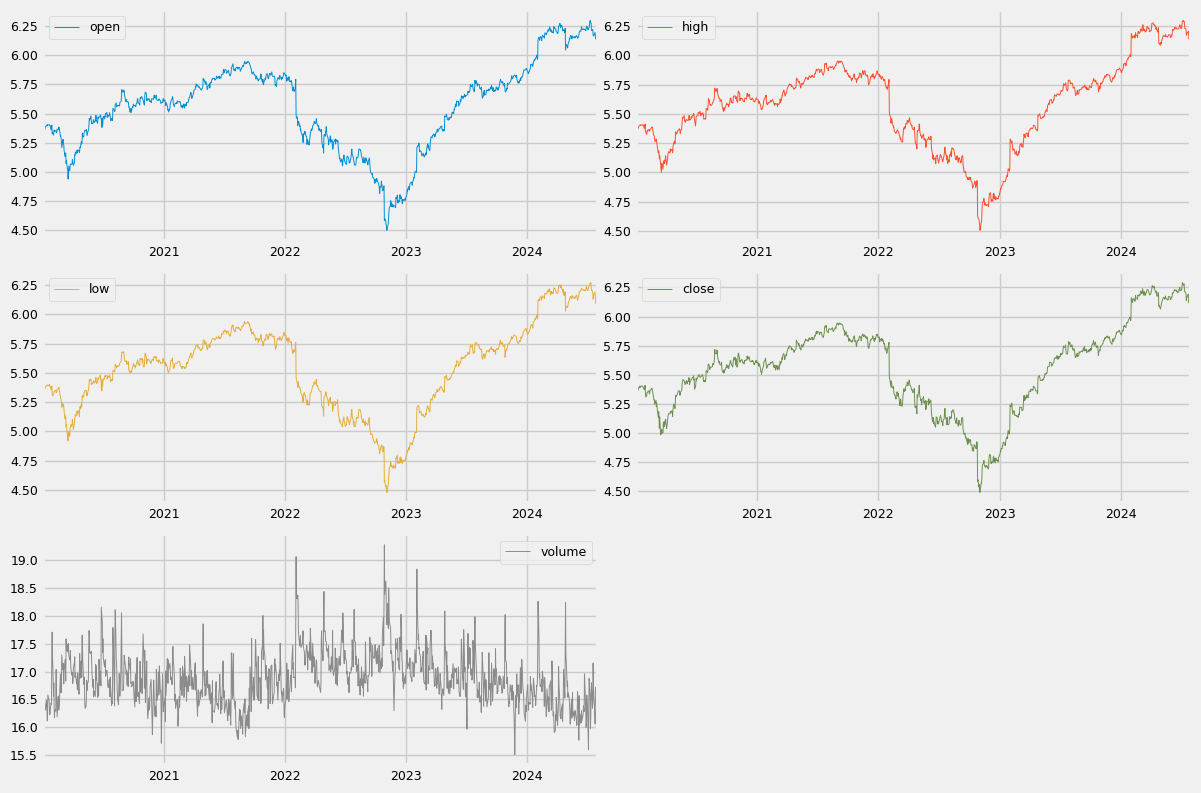

In [6]:
# apply natural logarithm function
df[['open', 'high', 'low', 'close', 'volume']].apply(np.log).plot(kind='line', subplots=True,
                        linewidth=0.7, title=None, xlabel='', layout=(3, 2), sharex=False, sharey=False, figsize=(12, 8))
plt.tight_layout()
    
plt.show()

Tăng trưởng chung: Tất cả các giá trị đều có xu hướng tăng trở lại sau khoảng thời gian sụt giảm đáng kể vào năm 2022. Đây có thể là dấu hiệu của sự phục hồi trên thị trường tài chính.
Giai đoạn giảm mạnh: Năm 2022, có sự giảm mạnh ở tất cả các chỉ số, điều này có thể liên quan đến các yếu tố như khủng hoảng tài chính, chính trị hoặc các yếu tố kinh tế vĩ mô khác.
Phân tán dữ liệu: Các biểu đồ đều sử dụng hàm logarit, giúp làm phẳng các biến động lớn, do đó biểu đồ dễ đọc hơn với các xu hướng dài hạn.

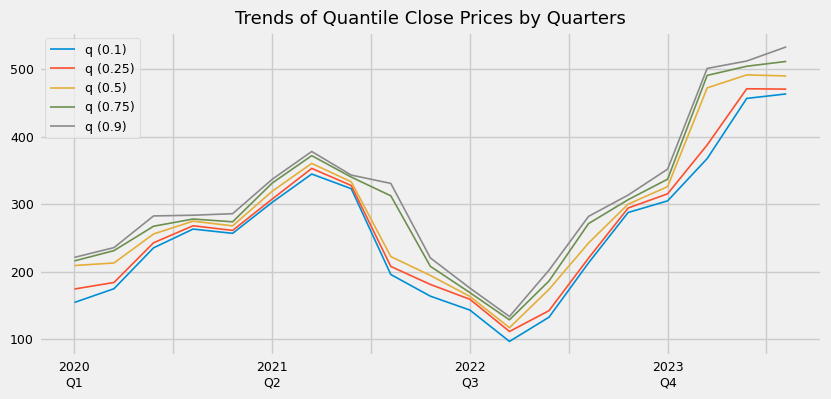

In [9]:
# date in YYYY-QQ format
year_quarter = lambda x: x['year'].astype(str) + '\nQ' + x['quarter'].astype(str)

# close price plot for different quantiles
plt.figure(figsize=(9, 4))

for i in [0.1, 0.25, 0.5, 0.75, 0.9]:
    df.groupby(year_quarter(df))['close'].quantile(i).plot(label='q ({})'.format(i), linewidth=1.2)
    
plt.title('Trends of Quantile Close Prices by Quarters')
plt.xlabel(None)
plt.legend()

plt.show()

Các phân vị trả về các đường xu hướng mượt mà hơn và hiển thị cách thị trường giảm và tăng trở lại. Giá phân vị cao hơn đã tăng theo thời gian và giá phân vị thấp hơn đã giảm. Dễ dàng phát hiện ra sự sụt giảm giá cổ phiếu nghiêm trọng trên thị trường. Sự sụp đổ đáng kể đầu tiên bắt đầu vào năm 2020 do đại dịch COVID-19 toàn cầu. Sự suy giảm tài chính thứ hai là vào năm 2022 do cuộc xâm lược Ukraine của Nga và lo ngại về suy thoái kinh tế.

Tăng trưởng dài hạn: Từ năm 2020 đến 2023, tất cả các phân vị đều tăng trưởng mạnh, đặc biệt rõ ràng vào giai đoạn 2023, điều này có thể biểu thị một sự phục hồi hoặc phát triển của thị trường.
Biến động năm 2022: Tất cả các phân vị đều sụt giảm mạnh trong năm 2022 (Quý 2 đến Quý 3), điều này phản ánh một giai đoạn khó khăn.
Hồi phục đồng đều: Sau sự suy giảm, giá trị đóng cửa tăng đều đặn ở tất cả các phân vị, điều này chỉ ra sự đồng nhất trong xu hướng phục hồi

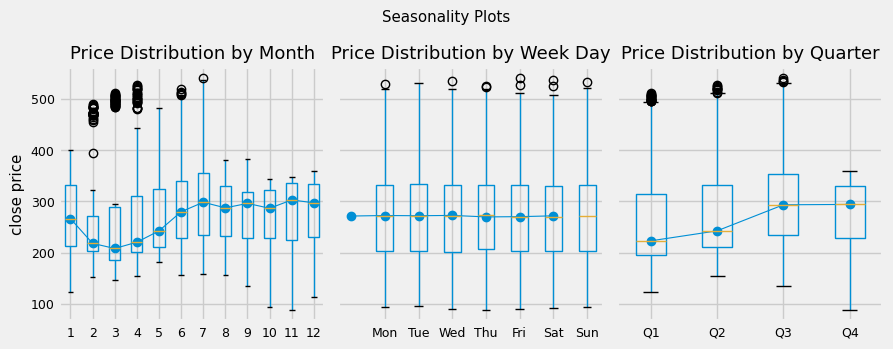

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3.5), sharex=False, sharey=True, tight_layout=True)
axes = axes.ravel()

# price distribution by month
df.boxplot(column='close', by='month', ax=axes[0])
df.groupby('month')['close'].median().plot(style='o-', linewidth=0.8, ax=axes[0])
axes[0].set(title='Price Distribution by Month', xlabel=None, ylabel='close price')

# price distribution by weekend day
df.boxplot(column='close', by='dayofweek', ax=axes[1])
df.groupby('dayofweek')['close'].median().plot(style='o-', linewidth=0.8, ax=axes[1])
axes[1].set(title='Price Distribution by Week Day', xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            xlabel=None)

# price distribution by year quarter
df.boxplot(column='close', by='quarter', ax=axes[2])
df.groupby('quarter')['close'].median().plot(style='o-', linewidth=0.8, ax=axes[2])
axes[2].set(title='Price Distribution by Quarter', xticklabels=['Q1', 'Q2', 'Q3', 'Q4'], xlabel=None)

fig.suptitle('Seasonality Plots')
plt.show()

dưới đây là các mô hình giao dịch theo tháng và quý. Ngày trong tuần dường như không có tác động nào đến giá cả
Biểu đồ bạn cung cấp thể hiện sự phân phối giá đóng cửa (close price) theo mùa vụ, được phân loại theo tháng, ngày trong tuần, và quý. Đây là dạng biểu đồ boxplot, giúp dễ dàng quan sát các đặc điểm chính như trung vị, phạm vi giá trị, và các giá trị ngoại lê
Có sự tăng nhẹ trong trung vị (median) từ đầu năm (tháng 1) đến cuối năm (tháng 12).
Tháng 3 và tháng 4 có nhiều giá trị ngoại lệ (outliers) hơn, điều này có thể liên quan đến sự biến động lớn trên thị trường trong thời điểm này.
Gợi ý: Nên kiểm tra thêm về các sự kiện hoặc yếu tố thời vụ (ví dụ: báo cáo tài chính, chính sách) có thể tác động trong giai đoạn này.
2. Phân phối theo ngày trong tuần
Quan sát chung:
Trung vị giá đóng cửa tương đối ổn định từ thứ Hai đến Chủ nhật.
Tuy nhiên, thứ Sáu và Chủ nhật dường như có nhiều giá trị ngoại lệ hơn, có thể do các biến động bất thường trước hoặc sau cuối tuần.
Gợi ý: Bạn có thể xem xét yếu tố thanh khoản giảm vào cuối tuần hoặc các yếu tố tâm lý giao dịch.
3. Phân phối theo quý
Quan sát chung:
Giá đóng cửa có xu hướng tăng từ Quý 1 đến Quý 4.
Quý 3 có nhiều ngoại lệ hơn, điều này có thể là dấu hiệu của các sự kiện bất thường hoặc mức độ biến động cao trong giai đoạn này.
Gợi ý: Nếu có dữ liệu, bạn nên phân tích sâu hơn các yếu tố gây biến động trong Quý 3.

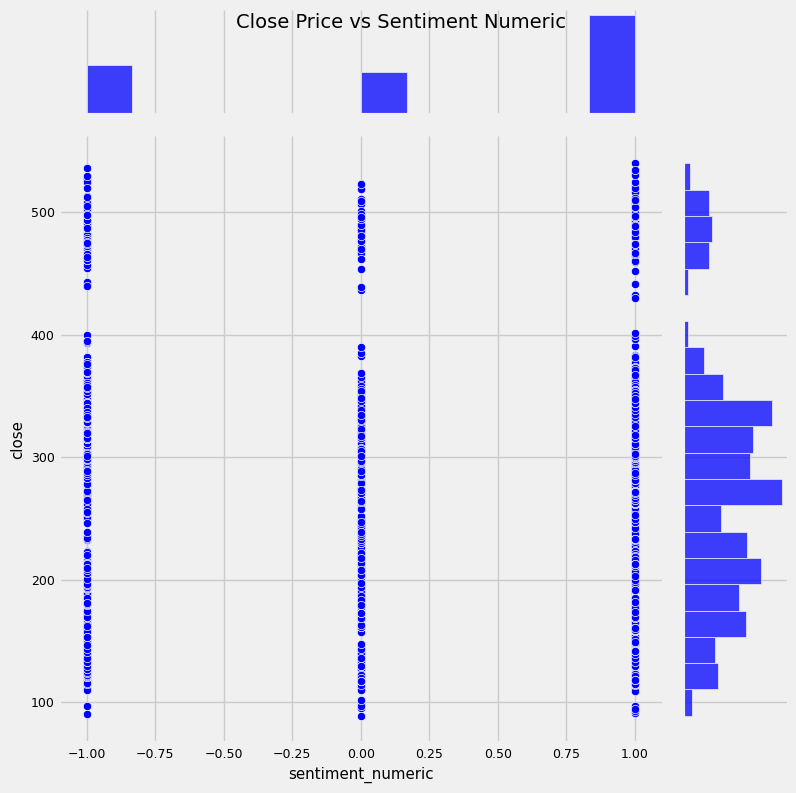

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ scatter plot với marginal histograms
sns.jointplot(x='sentiment_numeric', y='close', data=df, kind='scatter', color='b', height=8)

plt.suptitle('Close Price vs Sentiment Numeric', fontsize=14)
plt.show()


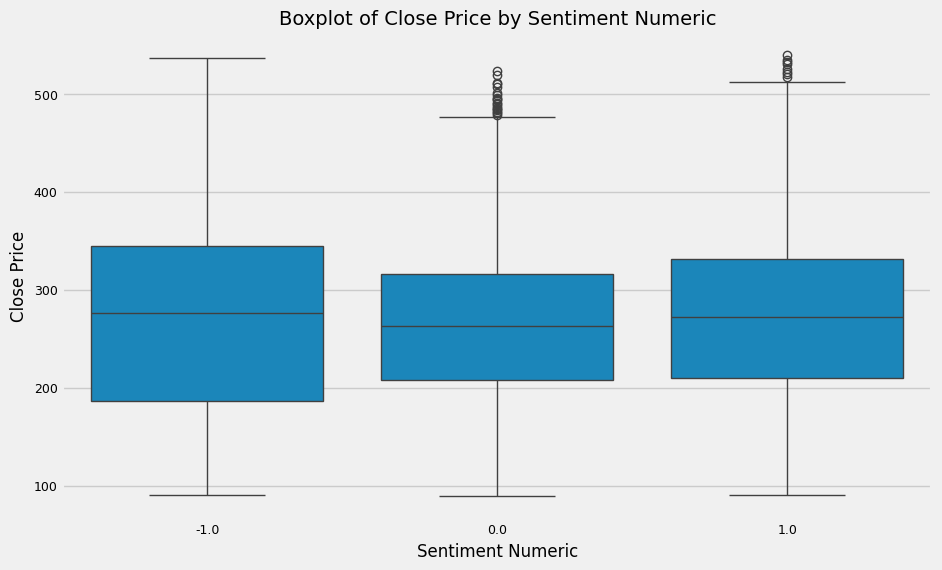

In [24]:
plt.figure(figsize=(10, 6))

# Vẽ boxplot giữa 'close' và 'sentiment_numeric'
sns.boxplot(x='sentiment_numeric', y='close', data=df)

plt.title('Boxplot of Close Price by Sentiment Numeric', fontsize=14)
plt.xlabel('Sentiment Numeric', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()


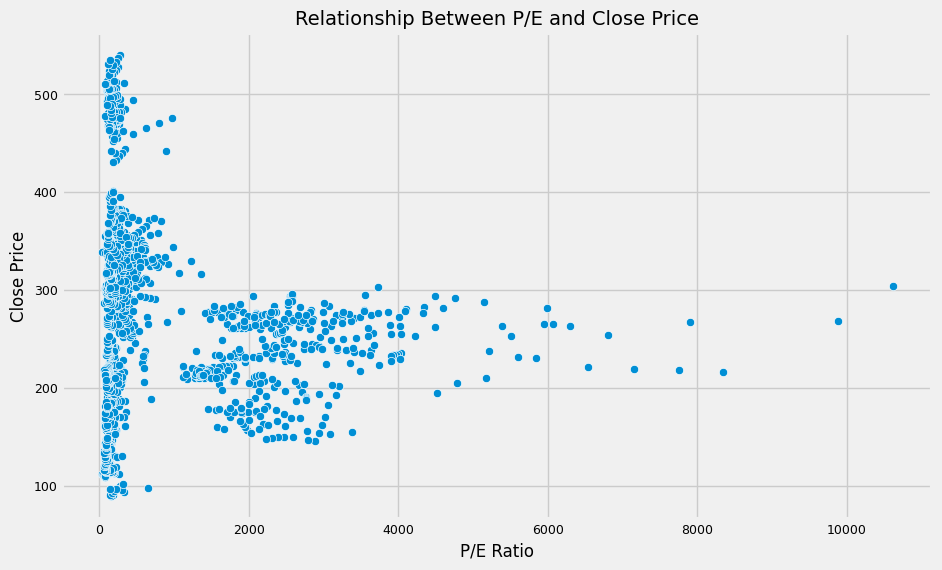

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ scatter plot giữa 'P/E' và 'close'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='P/E', y='close', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Relationship Between P/E and Close Price', fontsize=14)
plt.xlabel('P/E Ratio', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()


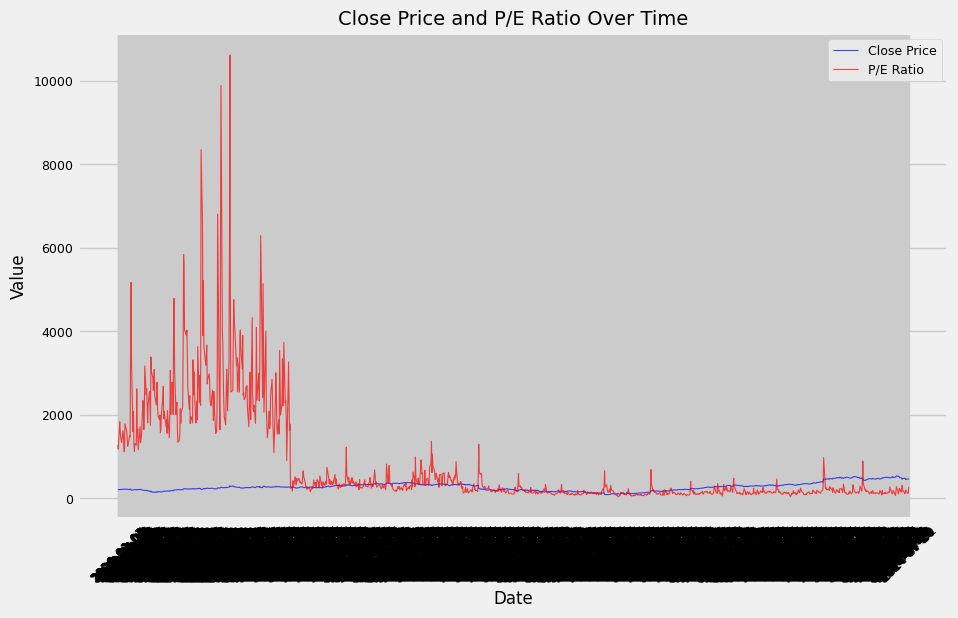

In [34]:
plt.figure(figsize=(10, 6))

# Vẽ line plot cho 'close' và 'P/E'
plt.plot(df['date'], df['close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(df['date'], df['P/E'], label='P/E Ratio', color='red', alpha=0.7)

# Thêm tiêu đề và nhãn trục
plt.title('Close Price and P/E Ratio Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()
